In [1]:
# Exo 1 - Préparation des données 

# importation du fichier
import pandas as pd 
data = pd.read_csv("synthetic.csv")

# Visualisation des données
print(data.head())


      Attr_A     Attr_B       Attr_C      Attr_D      Attr_E       Attr_F  \
0  12.478064  14.784992  1247.541877  100.962061   52.462177  1089.398211   
1   8.264345   8.854181  1389.686814   99.526529   65.106526  1186.523399   
2   9.875571  13.292442   779.077401  123.993772  104.699796  1201.722480   
3   9.207661   9.346913   965.468523   89.176009  102.628284   743.913507   
4   8.863842  12.542969  1096.386230  106.595385  131.813380   883.059615   

      Attr_G     Attr_H     Attr_I      Attr_J       Attr_K     Attr_L  \
0  10.575834   8.375407  10.288159  110.746551   994.367610   9.069350   
1   9.500485  10.088058   9.371983   78.210274   943.089589   9.988919   
2   9.545266  14.266238   9.703551   86.252483  1082.989190  10.084217   
3   9.777953  11.613946   8.912059   96.727873   812.800511   8.621781   
4  10.092974  13.556029  11.649982   21.566576   971.083175  10.072271   

        Attr_M      Attr_N  Class  
0  1027.953917  109.672758      1  
1  1120.317724   83.

/tmp/ipykernel_32893/1950219857.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1 - Nombre de colonnes (attributs) dans le DataFrame


In [2]:
# 1 - Nombre de colonnes (attributs) dans le DataFrame
num_attributes = data.shape[1]

# Afficher le nombre d'attributs
print(f"Le nombre d'attributs dans le fichier est : {num_attributes}")


Le nombre d'attributs dans le fichier est : 15


In [3]:
# Type de données et valeurs manquantes
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2298 entries, 0 to 2297
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Attr_A  2298 non-null   float64
 1   Attr_B  2298 non-null   float64
 2   Attr_C  2298 non-null   float64
 3   Attr_D  2298 non-null   float64
 4   Attr_E  2298 non-null   float64
 5   Attr_F  2298 non-null   float64
 6   Attr_G  2298 non-null   float64
 7   Attr_H  2298 non-null   float64
 8   Attr_I  2298 non-null   float64
 9   Attr_J  2298 non-null   float64
 10  Attr_K  2298 non-null   float64
 11  Attr_L  2298 non-null   float64
 12  Attr_M  2298 non-null   float64
 13  Attr_N  2298 non-null   float64
 14  Class   2298 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 269.4 KB
None


In [4]:
# Avoir le nombre d'attributs dans le modèle
print(data.columns)
# 14 attributs dans le modèle

Index(['Attr_A', 'Attr_B', 'Attr_C', 'Attr_D', 'Attr_E', 'Attr_F', 'Attr_G',
       'Attr_H', 'Attr_I', 'Attr_J', 'Attr_K', 'Attr_L', 'Attr_M', 'Attr_N',
       'Class'],
      dtype='object')


## 2 - Nombre de classes différentes

In [5]:
# 2 - Nombre de classes différentes 
# Obtenir les classes uniques dans la colonne 'Class'
classes_uniques = data['Class'].unique()

# Nombre de classes différentes
num_classes = len(classes_uniques)

# Afficher le nombre de classes différentes
print(f"Le nombre de classes différentes dans les données est : {num_classes}")

Le nombre de classes différentes dans les données est : 4


## 3 - Combien d'instances compte chaque classe?

In [6]:
# 3 - combien d'instances compte chaque classe?
distribution_classes = data['Class'].value_counts()
print(distribution_classes)

# Sortie 
# Class
# 1    908
# 0    674
# 2    472
# 3    244
# Name: count, dtype: int64

Class
1    908
0    674
2    472
3    244
Name: count, dtype: int64


## 4 - Les données sont-elles linéairement séparables ?
Non, si on observe le schéma 1 on voit que les données ne le sont pas.
De plus si l'on choisit de les ranger par classe , on peut s'apercevoir que 


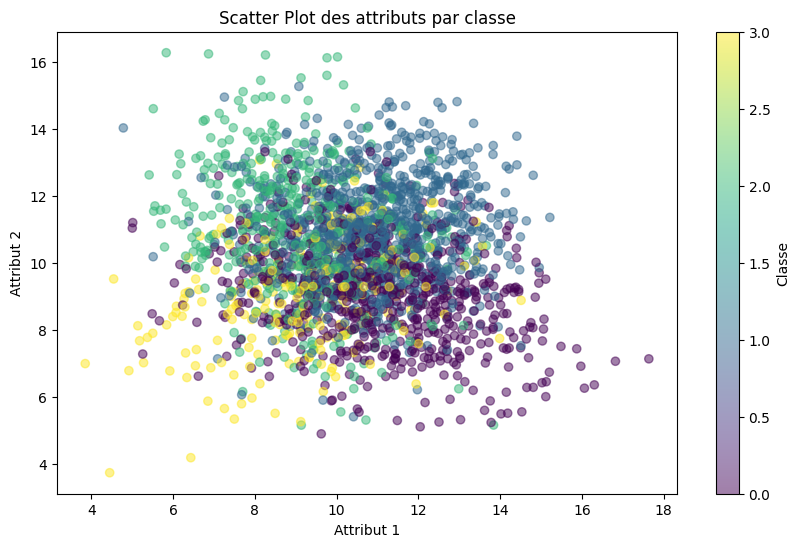

In [7]:
import matplotlib.pyplot as plt # import biblio matplot
plt.figure(figsize=(10, 6))
plt.scatter(data['Attr_A'], data['Attr_B'], c=data['Class'], alpha=0.5, cmap='viridis')
plt.xlabel('Attribut 1')
plt.ylabel('Attribut 2')
plt.title('Scatter Plot des attributs par classe')
plt.colorbar(label='Classe')


plt.savefig('lineairement_independant.png', format='png')

plt.show()

# On peut voir clairement que ce n'est pas divisible linéairement à l'état brut
# je pense que use image est vraiment mieux


# 5 - 
- Pour l'arbre de décision
    Puisque les variables sont déjà numériques et que la colonne Class est utilisée comme étiquette (et non comme une fonctionnalité), aucun encodage One-hot n'est nécessaire pour les fonctionnalités. Si Class était utilisée comme une caractéristique d'entrée plutôt que comme une étiquette, et si elle comprenait de nombreuses catégories différentes, l'encodage One-hot pourrait être envisagé pour éviter de donner un ordre artificiel entre les catégories.
    Pour un modèle basé sur un arbre de décision, la normalisation des données n'est généralement pas nécessaire. Les arbres de décision ne sont pas sensibles à la magnitude des valeurs des attributs de la même manière que le sont les modèles basés sur des calculs de distance ou des modèles linéaires. Voici pourquoi :

- Pour le réseau de neurones 
    